<a href="https://colab.research.google.com/github/Lasturka/etn-AI/blob/main/_1_Etn_milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Analysis (LDA)

## Importing the dataset

*   Pandas library to load csv
*   Independent variables (X): all rows incl. first header | columns from the third till the end
*   Dependent variable (y): second column
*   First column irrelevant

In [171]:
import pandas as pd
dataset = pd.read_csv('milk.csv')
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

## Splitting the dataset into the Training set and Test set

*   keeping default 75 % train set, 25 % test set
*   random_state for consistent results



In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Feature Scaling

*   Use standardization to resize values (mean -> 0, std. dev. = 1) for enhance model performance
*   test set uses values computed on train set



In [173]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying LDA

*   classification algorithm to reduce dimensionality
*   find linear combinations of the observations
*   extracted features set to 2 because of possibility visualization in 2D graph (at the end)
*   supervised (relation to the dependent variable)
*   maximizing the component axes for class-separation


In [174]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_trainLDA = lda.fit_transform(X_train, y_train)
X_testLDA = lda.transform(X_test)

## Applying PCA

*   classification algorithm to reduce dimensionality
*   component axes that maximize the variance

In [175]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

## Applying Kernel PCA

*   radial basis funcion kernel instead of linear


In [176]:
from sklearn.decomposition import KernelPCA as KPCA
kpca = KPCA(n_components=2, kernel = 'rbf')
X_trainKPCA = kpca.fit_transform(X_train)
X_testKPCA = kpca.transform(X_test)

## Training the Logistic Regression model on the Training set

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
classifierLDA = LogisticRegression(random_state = 0, max_iter=10000)
classifierLDA.fit(X_trainLDA, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [179]:
classifierPCA = LogisticRegression(random_state = 0, max_iter=10000)
classifierPCA.fit(X_trainPCA, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [180]:
classifierKPCA = LogisticRegression(random_state = 0, max_iter=10000)
classifierKPCA.fit(X_trainKPCA, y_train)

LogisticRegression(max_iter=10000, random_state=0)

## Making the Confusion Matrix and compute accuracy




In [181]:
from sklearn.metrics import confusion_matrix, accuracy_score

## Resuls for Linear Discriminant Analysis
*   Out of 113 predictions (1/4 of total 450 measurments):
1.   101 correct predictions (89 %) of lactose content group
2.   12 incorrect predictions (11 %), of which 8 predicted lower content of lactose and 4 predicted higher content than actual

*   I coudl't find, why accuracy accross 10 different train/test sets was 100% +- 0 % and clearly not correspond to accuracy of chosen train/test set

In [182]:
y_predLDA = classifierLDA.predict(X_testLDA)
cm = confusion_matrix(y_test, y_predLDA)
print(cm)
print("Accuracy score: {:.2f} %".format(accuracy_score(y_test, y_predLDA)*100))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierLDA, X = X_trainLDA, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[15  0  0  0  0  0  0  0  0]
 [ 0 12  1  0  0  0  0  0  0]
 [ 0  0 11  2  0  0  0  0  0]
 [ 0  0  3 11  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  1  8  1  0]
 [ 0  0  0  0  0  0  0 10  4]
 [ 0  0  0  0  0  0  0  0 11]]
Accuracy score: 89.38 %
Accuracy: 100.00 %
Standard Deviation: 0.00 %


## Resuls for Principal Component Analysis
*   Out of 113 predictions:
1.   102 correct predictions (90 %) of lactose content group
2.   11 incorrect predictions (10 %) of which 8 predicted lower content of lactose and 3 predicted higher content than actual

In [183]:
y_predPCA = classifierPCA.predict(X_testPCA)
cm = confusion_matrix(y_test, y_predPCA)
print(cm)
print("Accuracy score: {:.2f} %".format(accuracy_score(y_test, y_predPCA)*100))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierPCA, X = X_trainPCA, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[15  0  0  0  0  0  0  0  0]
 [ 0 12  0  1  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0]
 [ 0  0  0 13  0  1  0  0  0]
 [ 0  0  0  0 11  0  3  0  0]
 [ 0  0  0  0  0  7  2  0  0]
 [ 0  0  0  0  0  1  8  1  0]
 [ 0  0  0  0  0  0  1 13  0]
 [ 0  0  0  0  0  0  0  1 10]]
Accuracy score: 90.27 %
Accuracy: 90.20 %
Standard Deviation: 4.02 %


## Resuls for Kernel Principal Component Analysis
*   Out of 113 predictions:
1.   only 64 correct predictions (56.5 %)
2.   49 incorrect predictions (43,5 %)

In [184]:
y_predKPCA = classifierKPCA.predict(X_testKPCA)
cm = confusion_matrix(y_test, y_predKPCA)
print(cm)
print("Accuracy score: {:.2f} %".format(accuracy_score(y_test, y_predKPCA)*100))

[[ 0  0  0  0  0  0  0  0 15]
 [ 0 11  0  2  0  0  0  0  0]
 [ 0  0  8  4  0  1  0  0  0]
 [ 0  2  5  7  0  0  0  0  0]
 [ 0  0  0  0  0  8  3  3  0]
 [ 0  0  0  0  0  6  3  0  0]
 [ 0  0  0  0  0  1  8  1  0]
 [ 0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  1 10]]
Accuracy score: 56.64 %


## Models comparison and final restult

*   PCA and LDA shows both similar and very good result prediction of ~90 %
*   Using radial basis function showed poor accuracy slightly above 50 %, but:
*   If we remove limit of components, PCA and KPCA has significantly higer accuracy of ~98 %, resp. ~92 %, but then we cannot plot ~8D graph :)
*   I tryed also XGBClassifier (not shown here) with results about 88 %



## Visualising the Training set results

*   for LDA
*   showing on train set





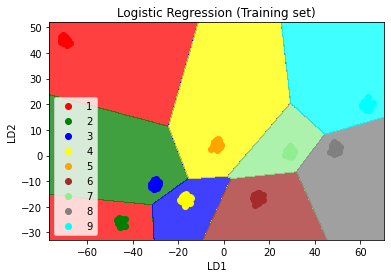

In [196]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
X_set, y_set = X_trainLDA, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 5, stop = X_set[:, 0].max() + 5, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 5, stop = X_set[:, 1].max() + 5, step = 0.1))
plt.contourf(X1, X2, classifierLDA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(["red", "green", "blue",
                                                  "yellow", "orange", "brown",
                                                  "lightgreen", "grey", "cyan"]))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ["red", "green", "blue",
                     "yellow", "orange", "brown",
                     "lightgreen", "grey", "cyan"][i], label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Visualising the Test set results

*   for LDA
*   showing on test set
*   we can see some of those 12 incorrect predictions



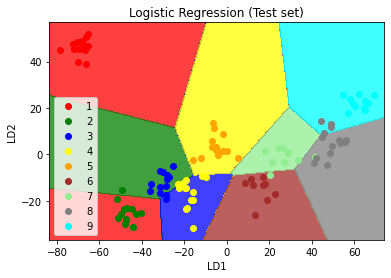

In [197]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_testLDA, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 5, stop = X_set[:, 0].max() + 5, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 5, stop = X_set[:, 1].max() + 5, step = 0.1))
plt.contourf(X1, X2, classifierLDA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(["red", "green", "blue",
                                                  "yellow", "orange", "brown",
                                                  "lightgreen", "grey", "cyan"]))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ["red", "green", "blue",
                     "yellow", "orange", "brown",
                     "lightgreen", "grey", "cyan"][i], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()